In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

In [8]:
df = pd.read_csv("data/mega104-14-12-18-ioa.csv", sep=";")
# df = pd.read_csv("data/mega104-17-12-18-ioa.csv", sep=";")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14597 entries, 0 to 14596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TimeStamp      14597 non-null  object 
 1   Relative Time  14597 non-null  float64
 2   srcIP          14597 non-null  object 
 3   dstIP          14597 non-null  object 
 4   srcPort        14597 non-null  int64  
 5   dstPort        14597 non-null  int64  
 6   ipLen          14597 non-null  int64  
 7   len            14597 non-null  int64  
 8   fmt            14597 non-null  object 
 9   uType          1156 non-null   object 
 10  asduType       9657 non-null   float64
 11  numix          9657 non-null   float64
 12  cot            9657 non-null   float64
 13  oa             9657 non-null   float64
 14  addr           9657 non-null   float64
 15  ioa            9657 non-null   object 
dtypes: float64(6), int64(4), object(6)
memory usage: 1.8+ MB


In [10]:
def find_communication_pairs(df: pd.DataFrame) -> dict:
    d = dict()
    i = 1
    for (x,y) in zip(df['srcIP'], df['dstIP']):
        if (x,y) not in d:
            d[(x,y)] = i
            i = i + 1
    return d

In [11]:
communication_pairs = find_communication_pairs(df)
# inv = {v: k for k, v in communication_pairs.items()}

df['commId'] = df.apply(lambda row: communication_pairs[(row['srcIP'], row['dstIP'])], axis=1)

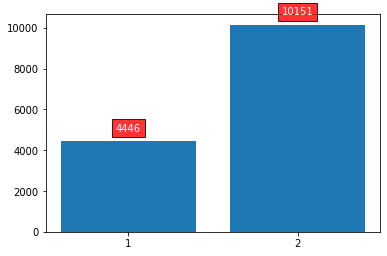

1: 192.168.11.111 -> 192.168.11.248
2: 192.168.11.248 -> 192.168.11.111


In [12]:
# comm_ids = list(f"{x}\n{y}" for x,y in communication_pairs.keys())
comm_ids = list(str(x) for x in communication_pairs.values())
comm_count = list(np.count_nonzero(df['commId'] == x) for x in communication_pairs.values())
# labels = communication_pairs.values()
plt.bar(x = comm_ids, height = comm_count)
for i in range(len(comm_ids)):
        plt.text(i, comm_count[i] + 500, comm_count[i], ha = 'center', color='white', bbox = dict(facecolor = 'red', alpha =.8))
plt.show()
for k, v in communication_pairs.items():
    print(f"{v}: {k[0]} -> {k[1]}")